# Correlação e Regressão Linear
- Pima Indians Diabetes

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [29]:
# Carregamento dos dados
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv('diabetes.csv', names=column_names, header=0)

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## 01 Analisando a correlação dos dados e Data Cleaning

In [30]:
# Dataframe com dos dados nulos removidos
df_clean = df.dropna(inplace=False)

# Select only numerical features for correlation analysis
numerical_df = df_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Display the correlation matrix
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


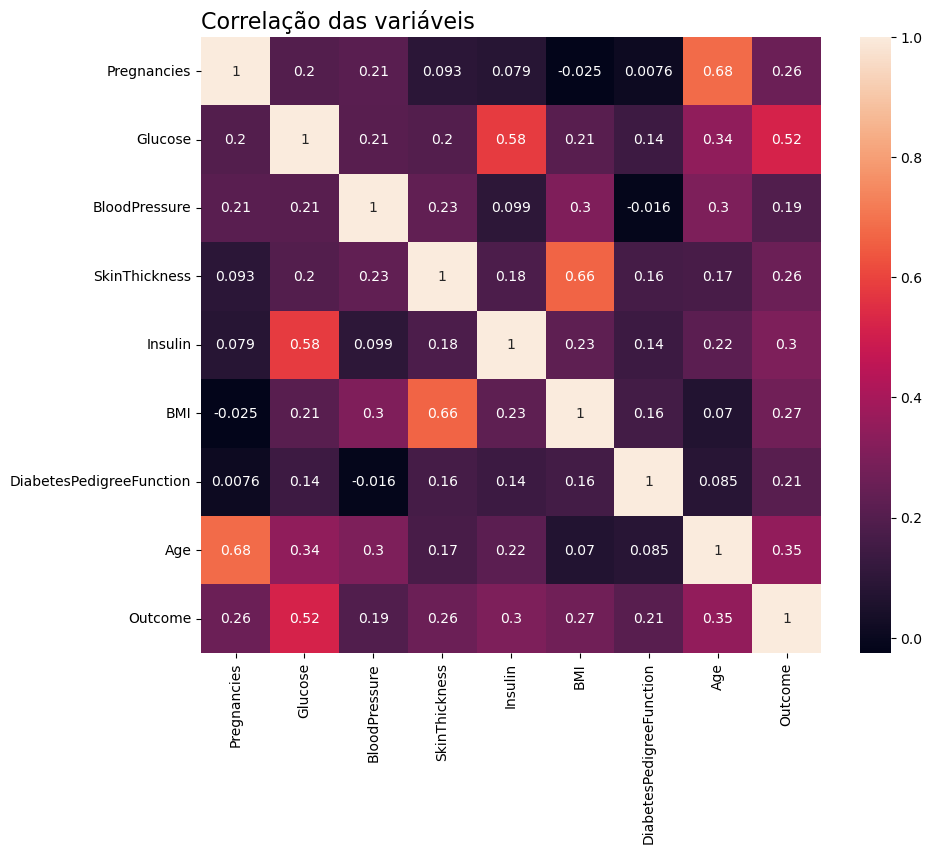

In [31]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

## 2. Separar os dados de treino e teste

In [32]:
# Para realizar a regressão simples
X_simple = df_clean[['Glucose']]
y = df_clean['Insulin']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [33]:
# Para realizar a regressão múltipla
X_multi = df_clean.drop(columns=['Insulin', 'Outcome'])  # remove Insulin (alvo) e Outcome (classificação)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [34]:
# 3. Regressão simples
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
rmse_simple = sqrt(mean_squared_error(y_test_s, y_pred_s))

In [35]:
# 4. Regressão múltipla
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
rmse_multi = sqrt(mean_squared_error(y_test_m, y_pred_m))

In [36]:
# 5. Resultados
print(f"RMSE Regressão Simples (Glicose → Insulina): {rmse_simple:.2f}")
print(f"RMSE Regressão Múltipla (Todas as variáveis → Insulina): {rmse_multi:.2f}")

RMSE Regressão Simples (Glicose → Insulina): 92.82
RMSE Regressão Múltipla (Todas as variáveis → Insulina): 94.10


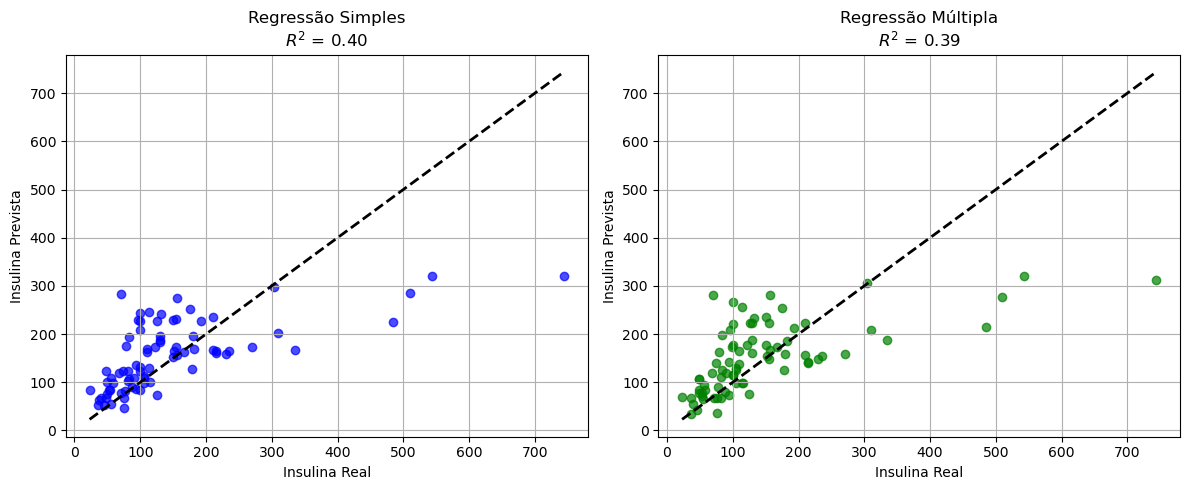

In [37]:
# Calcular R² para ambos os modelos
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)

# Gráfico: Regressão Simples
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='blue')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel('Insulina Real')
plt.ylabel('Insulina Prevista')
plt.title(f'Regressão Simples\n$R^2$ = {r2_simple:.2f}')
plt.grid(True)

# Gráfico: Regressão Múltipla
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel('Insulina Real')
plt.ylabel('Insulina Prevista')
plt.title(f'Regressão Múltipla\n$R^2$ = {r2_multi:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

## 6 Interpretação dos resultados

- O RMSE (Root Mean Squared Error) representa o erro médio das previsões do modelo em relação aos valores reais, e é medido na mesma unidade da variável prevista — neste caso, insulina (μU/mL).

- Um RMSE de 92.82 na regressão simples significa que, em média, as previsões do modelo erram por cerca de 92 unidades de insulina.

- Isso não indica o erro máximo, mas sim a magnitude média dos erros, com penalização maior para erros grandes.

- Se os níveis médios de insulina no conjunto de dados variam entre 100 e 200 μU/mL, um RMSE de 92 representa um erro relativamente alto, indicando que o modelo tem baixa precisão na predição da insulina.

- A regressão múltipla, com RMSE de 94.10, teve desempenho ainda ligeiramente pior, sugerindo que as variáveis adicionais não contribuíram significativamente para melhorar a predição.

Esses resultados sugerem que a insulina pode ser difícil de prever com base nas variáveis disponíveis, ou que há alta variabilidade nos dados que os modelos lineares não conseguem capturar bem.